# **Key Indicators of Heart Disease:**

Heart Disease is one of the leading causes of death in the United States.  Heart Disease has some established risk factors such as High Blood Pressure, High Cholesterol and Smoking.  As per the Center for Disease Control (CDC), 47% of all Americans have one of the three risk factors.  Some other factors that we have no control but have an impact on Heart Disease include genetics, environmental factors and aging.  In this dataset I explore two other indicators, Diabetes and higher than normal BMI, and their impact on heart disease. 

A branch of CDC called the Behavioral Risk Factor Surveillance System (BRFSS) condcts a telephonic health survey annually that collects state data from U.S. residents regarding their health related risk behaviors and chronic health conditions.  The BRFSS was established in 1984 with surveys conducted in 15 states and since then it has expanded to all 50 states, District of Columbia adn three U.S. territories.  Every year, the BRFSS conducts about 400,000 interviews making it the largest continuously conducted health survey system in the world.  

The latest survey data conducted was conducted in the year 2020.  The dataset that I have used to do the analysis here, I found on Kaggle and is a subset of the data that comes from this survey.  This dataset has over 300,000 respondents or rows and about 20 variables or columns.  

Physicians and health care providers that are directly involved in health of the population are constantly looking for more indicators that may accurately predict heart disease.  Studying a large dataset like this over many years will continue to establish more patterns that can be used to either reduce the incidence of heart disease or tailor medications to prevent heart disease.  

Tech companies that are working on wearables that monitor heart rate, step count, sleep and many more in the pipeline are an emerging group that are constantly looking for a large dataset with many key health indicators.  On one hand, tech wearables are getting more advanced and COVID has expanded how much telemedicine can truly accomplish, continuous surveying from the BRFSS program and data like these can help improve lifestyles of individual to reduce risk of heart disease and in turn improve the health of the population.  


# **Dataset Source and Information:**

The original CDC Data from the latest annual BRFSS survey can be found at the following link.  
 [CDC 2020 Annual Health Survey Data](https://www.cdc.gov/brfss/annual_data/annual_2020.html)

Here is the link to the sheet that was created that was used for the data analysis.  This has all the usable data in excel format in a single sheet.
[Heart_2020_CDC_Data](https://docs.google.com/spreadsheets/d/1JXuXXoSgaWJXFoXTJAW7e2W2kPCyiJAj/edit?usp=sharing&ouid=105532110594844325649&rtpof=true&sd=true)

# **Import Modules and Mount Data:** 

### Import all libraries that we will be using for our analyis and mount data from google drive.

In [ ]:
# Import libraries we will use
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import math
sns.set_style("white")

In [ ]:
# Mount the data from drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Bringing in the Dataset and getting to know the data:**

First we read the excel file and then we familiarize ourselves with all the different variables that are included in this dataset.  

In [ ]:
#Read the Data
key_indicators = pd.read_excel('/content/gdrive/My Drive/Colab Datasets/Heart_2020_CDC_Data .xlsx')
#pd.read_excel('/content/gdrive/My Drive/Colab Datasets/Heart_2020_CDC_Data .xlsx')
key_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID number         319795 non-null  int64  
 1   HeartDisease      319795 non-null  object 
 2   BMI               319795 non-null  float64
 3   Smoking           319795 non-null  object 
 4   AlcoholDrinking   319795 non-null  object 
 5   Stroke            319795 non-null  object 
 6   PhysicalHealth    319795 non-null  int64  
 7   MentalHealth      319795 non-null  int64  
 8   DiffWalking       319795 non-null  object 
 9   Sex               319795 non-null  object 
 10  AgeCategory       319795 non-null  object 
 11  Race              319795 non-null  object 
 12  Diabetic          319795 non-null  object 
 13  PhysicalActivity  319795 non-null  object 
 14  GenHealth         319795 non-null  object 
 15  SleepTime         319795 non-null  int64  
 16  Asthma            31

## Understanding the Variables:
*   **HeartDisease:** *Yes/ No question, have they been diagnosed with heart disease.*
*   **BMI:**  *Gives a range of quantitative values*
*   **Smoking:** *Yes/No question, Yes if more than a 100 cigarettes their entire life (5packs)*
*   **AlcoholDrinking:** *Yes/No question, Yes for men if more than 14 drinks per week and Yes for women if more than 7 drinks per week.  *
*   **Stroke:** *Yes/No question*
*   **PhysicalHealth:**  *How many days in the last month was your physical health not good. (0-30)*
*   **MentalHealth:**  *How many days in the last month was your mental health not good. (0-30)*
*   **DiffWalking:**  *Do you have serious difficulty walking or climbing stairs?*
*   **Sex:**  *Male/ Female*
*   **AgeCategory:**  1*4 level age category*
*   **Race:**  *Choice of 6 different race categories*
*   **Diabetic:**  *Yes/ No/ No, Boderline/ Yes, During pregnancy* 
*   **PhysicalActivity:** *reported doing physical activity in the past month. (0-30)*
*   **GenHealth:**  *Excellent/VeryGood/Good/Fair/Poor*
*   **SleepTime:**  *In a 24 hour period you sleep for how many hours?*
*   **Asthma:**  *Yes/No*
*   **KidneyDisease:**  *Yes/No*
*   **SkinCancer:**  *Yes/No*

In [ ]:
#quick look at our data
key_indicators.head(5)

,ID number,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,2,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,3,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,4,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,5,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


### There are so many variables that are used in this dataset that are key indicators of health.  

### For this dataset, we will be focusing on HeartDisease, BMI, Diabetic, and AgeCategory

In [ ]:
new_key_indicators = key_indicators[["BMI", "HeartDisease", "Diabetic", "AgeCategory"]]
new_key_indicators.head()

,BMI,HeartDisease,Diabetic,AgeCategory
0,16.60,No,Yes,55-59
1,20.34,No,No,80 or older
2,26.58,No,Yes,65-69
3,24.21,No,No,75-79
4,23.71,No,No,40-44


#**Explore the Data**

In [ ]:
# Descriptive Statistics
key_indicators.describe()

,ID number,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000
mean,159898.000000,28.325399,3.37171,3.898366,7.097075
std,92317.009005,6.356100,7.95085,7.955235,1.436007
min,1.000000,12.020000,0.00000,0.000000,1.000000
25%,79949.500000,24.030000,0.00000,0.000000,6.000000
50%,159898.000000,27.340000,0.00000,0.000000,7.000000
75%,239846.500000,31.420000,2.00000,3.000000,8.000000
max,319795.000000,94.850000,30.00000,30.000000,24.000000


In [ ]:
#check to see how many people have BMI above 90
len(key_indicators[key_indicators['BMI'] > 90])

8

The above gives the general description of all the data, there are 319K respondents/ rows of data.  

The mean BMI for this dataset happens to be 28.325.  Most people on this dataset seem to be sleeping for 6-8 hours, which is great.  

Now I will look at the number of people with heart disease in each of the 14 age groups.

In [ ]:
#Create a crosstab of record count for age category and Heart Disease
pd.crosstab(new_key_indicators['AgeCategory'], new_key_indicators['HeartDisease'])


HeartDisease,No,Yes
AgeCategory,,
18-24,20934,130
25-29,16822,133
30-34,18527,226
35-39,20254,296
40-44,20520,486
45-49,21047,744
50-54,23999,1383
55-59,27555,2202
60-64,30359,3327


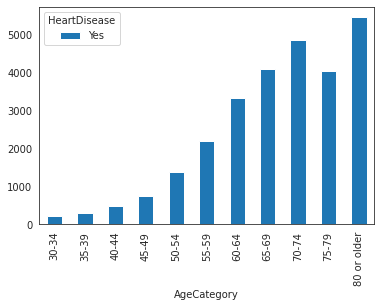

In [29]:
#visualize the increase in number of people with Heart Disease with age
hrtD_Y = age_30[age_30.HeartDisease == 'Yes']
age_hD = pd.crosstab(age_30['AgeCategory'], hrtD_Y['HeartDisease'])
barplot = age_hD.plot.bar(rot = 90)

As we can see at about 50-54 age range there is sharp increase in the number of people who have recorded yes for heart disease.  Any prevention should start years before this surge in numbers, so for this analysis to study key indicators, we consider age groups starting from 30.  

# Hypotheses

##Hypothesis 1:  
###Among people with and without heart disease, is there any difference in their BMI?
Ho: There is no significant difference in BMI between people with heart disease and without heart disease over the age of 30.

Ha: There is a significant difference in BMI between people with heart disease and without heart disease over the age of 30.  

In [ ]:
# Creating a variable age_30, that will have all information starting from this age range for all columns.  
age_30 = new_key_indicators[new_key_indicators.AgeCategory >='30-34' ]
pd.crosstab(age_30['AgeCategory'], age_30['HeartDisease'])

HeartDisease,No,Yes
AgeCategory,,
30-34,18527,226
35-39,20254,296
40-44,20520,486
45-49,21047,744
50-54,23999,1383
55-59,27555,2202
60-64,30359,3327
65-69,30050,4101
70-74,26218,4847


Let us have a look at the distribution of the BMI values in this dataset.

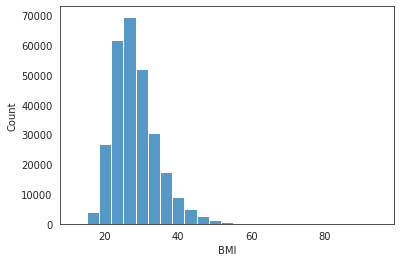

In [ ]:
sns.histplot(age_30['BMI'], bins = 25)

It looks very good.  Follows normal distribution, lets go on and perform the independent t-test on the BMI of the respondents who are 30 and above, that either have had heart disease or did not have heart disease.  

First just creating variables for the two categories mentioned.  

In [ ]:
hrtD_Y = age_30[age_30.HeartDisease == 'Yes']
hrtD_N = age_30[age_30.HeartDisease == 'No']


Now, lets check if all the values follow a similar normal distribution.

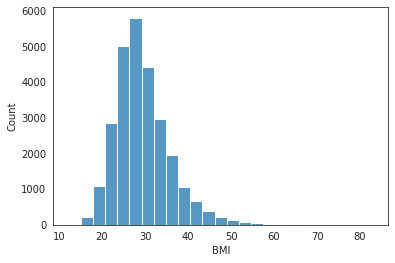

In [ ]:
sns.histplot(hrtD_Y['BMI'], bins = 25)

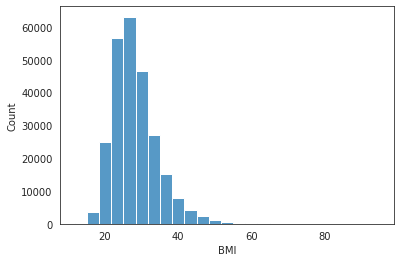

In [ ]:
sns.histplot(hrtD_N['BMI'], bins = 25)

Both of these subgroups follow a very good normal distribution as well. 

Now we will just go on to run the t-test to see if there is significant difference.

In [ ]:
stats.ttest_ind(hrtD_N['BMI'], hrtD_Y['BMI'])

Ttest_indResult(statistic=-23.84239302752976, pvalue=1.618670050451039e-125)

The p-value is << our alpha of 0.05, which tells us that it is unlikely to observe as extreme of a difference as we are seeing if Ho is true. Thus we reject Ho as the data provides convincing evidence to suggest Ho is wrong..

The data supports that there is a significant difference between the two groups.  

This means that there is significant difference between the BMI of people who have had heart disease and those that have not.  


### Insight from the analysis above:

Among people that have been diagnosed with Heart Disease, the difference in their BMI is statistically significant.  This analysis does not tells us if an increase in BMI is a cause for Heart Disease, but it could be a key indicator that needs to be monitored to either prevent the progression of heart disease or prevent heart disease in healthy population.  

## Hypothesis 2:
### Is there is any relationship between Diabetes and Heart Disease

Ho: There is no correlation between Heart Disease and Diabetes among population above the age of 30.  

Ha:  There is a greater incidence of Heart Disease among Diabetic population above the age of 30.

In [ ]:
#lets create a crosstab to see the 
pd.crosstab(age_30['Diabetic'], age_30['HeartDisease'])

HeartDisease,No,Yes
Diabetic,,
No,215431,17277
"No, borderline diabetes",5651,782
Yes,31374,8944
Yes (during pregnancy),2210,107


In [ ]:
#we will only consider groups that are either diabetic or not, above the age of 30 and will not consider groups with borderline and diabetes during pregnancy
new_age_30 = age_30[age_30['Diabetic'].isin(['Yes', 'No'])]
age_30D = age_30[age_30.Diabetic == 'Yes']

In [ ]:
#Create a crosstab of record count to see the total count 
table1 = pd.crosstab(new_age_30['Diabetic'], new_age_30['HeartDisease'])
print(table1)

HeartDisease      No    Yes
Diabetic                   
No            215431  17277
Yes            31374   8944


Since, both these groups carry Categorical values, lets look for correlation using the chi squared test for the two variables to see if there is any dependency between these two groups.  

In [ ]:
#chi squared test for correlation
stats.chi2_contingency(table1) 

(8621.003611281532, 0.0, 1, array([[210359.07913532,  22348.92086468],
        [ 36445.92086468,   3872.07913532]]))

The second value is the p-value and third value above is the Degrees of Freedom.

In [ ]:
#to print only the p-value, the second value from the above test
stat, p, dof, expected = stats.chi2_contingency(table1) 
print('p-value:' , p , ',', 'Degrees of Freedom:' , dof)

p-value: 0.0 , Degrees of Freedom: 1


p value is low (0.0) and we can reject the null hypothesis that there is no correlation between Heart Disease and Diabetes.  


To find out the strength of the correlation, I looked into a test called Cramer's V that measures the strength of the two categorical variables involved in the chi squared test.  

In [ ]:
#this test is not in the python libraries, so used the equation and math modules to compuet
math.sqrt(stat / (age_30D.shape[0] * dof))

0.4624123485594231

The value of correlation ranges from 0 to 1, for our test, it came back as 0.46, which implies moderately positive correlation.  

This means that there seems to be some correlation between Heart Disease and Diabetes.  This could mean that elevated blood sugar levels could be considered as a key indicator to keep track of heart health.  It is also important to bear in mind here that correlation does not imply causation.  

# Key Insights and Recommendations

Heart disease remains the leading cause of death in the United States, almost 7 million a year.  The population of United States is 320 million and this dataset has roughly data from 0.1% of the population of United States.  It is a large enough sample to make observations from but not enough to draw inferences or change the standard of care.  This dataset also provides information on physical activity time and asthma that I think might have impact on cardiovascular health as well.  It would be interesting to study BMI and Diabetes among the various races and genders.  This data is being collected across the entire country and therefore an interesting aspect that can be considered is the impact of geographical location and weather on the key indicators of Heart Disease.  

Since this is an annual survey, a new dataset is available every year.  It would be interesting to use the annual BRFSS data from one year to the next, across years to see trends.  Physicians and Scientists are constantly studying surveys to improve the health of the population and prevent the progression of heart disease.  They are studying data to identify more predictors of heart disease so they may be able to prevent any adverse event.  On the other hand, advancement in tech wearables are also providing the individual as well as the healthcare providers more information to improve their lifestyle.  Tech companies are constantly innovating along the lines of tech wearables, where today you can track number of steps/ miles walked, cardiovascular output during exercise, resting heart rate, skipped heart beats, sleep, quality of sleep, and many other features such as blood glucose monitoring that are in the pipeline. 

Post COVID telemedicine in combination with tech advancements with insights from analysis on datasets like these can give more power to indivudual and their healthcare provider to track their health indicators from as early as 30 years of age to prevent heart disease.  With physician oversight and AI advancements that provide tailored care, over time the number of adverse cardiovascular events may hopefully drop and decrease the number of deaths due to heart disease.  

# References:

1.   https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm
2.   https://www.cdc.gov/brfss/
3.   https://www.cdc.gov/brfss/annual_data/annual_2020.html
4.   https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-cramrs-v